##### Data Fetching and Imports

Fetch ids and images (not included in sklearn version of the dataset)

In [2]:
!pip install colored
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
!cat wdbc.data | cut -d',' -f1 > wdbc.ids
!wget -r -nH --cut-dirs 4  ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/

--2019-09-05 18:37:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data.2’

wdbc.data.2         100%[===================>] 121.19K   421KB/s    in 0.3s    

2019-09-05 18:37:03 (421 KB/s) - ‘wdbc.data.2’ saved [124103/124103]

--2019-09-05 18:37:04--  ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/
           => ‘cancer_images/.listing’
Resolving ftp.cs.wisc.edu (ftp.cs.wisc.edu)... 128.105.2.31
Connecting to ftp.cs.wisc.edu (ftp.cs.wisc.edu)|128.105.2.31|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /math-prog/cpo-dataset/machine-learn/cancer/cancer_imag

cancer_images/92_66 100%[===================>] 119.05K   548KB/s    in 0.2s    

2019-09-05 18:37:31 (548 KB/s) - ‘cancer_images/92_6682.gif’ saved [121908]

--2019-09-05 18:37:31--  ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/92_6954.gif
           => ‘cancer_images/92_6954.gif’
==> CWD not required.
==> PASV ... done.    ==> RETR 92_6954.gif ... done.
Length: 92602 (90K)

cancer_images/92_69 100%[===================>]  90.43K   523KB/s    in 0.2s    

2019-09-05 18:37:34 (523 KB/s) - ‘cancer_images/92_6954.gif’ saved [92602]

--2019-09-05 18:37:34--  ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/92_7241.gif
           => ‘cancer_images/92_7241.gif’
==> CWD not required.
==> PASV ... done.    ==> RETR 92_7241.gif ... done.
Length: 136276 (133K)

cancer_images/92_72 100%[===================>] 133.08K   610KB/s    in 0.2s    

2019-09-05 18:37:38 (610 KB/s) - ‘cancer_images/92_7241.gif’ saved [136276]

--2019-09-05 18:3

Package imports

In [16]:
import numpy as np
import sklearn.datasets
import pprint
import glob
from PIL import Image
import colored
import matplotlib.pyplot as plt

In [2]:
with open('wdbc.ids', 'r') as f:
    ids = f.readlines()
ids = [int(i.rstrip('\n')) for i in ids]


images = {}
for filename in glob.glob('cancer_images/*.gif'): #assuming gif
    fid = int(os.path.splitext(filename.split('/')[-1])[0].replace('_',''))
    images[fid] = Image.open(filename)
    
# Not all examples have images, only these
print(list(images.keys()))

[925236, 924934, 916838, 925622, 925291, 926954, 927241, 925292, 919555, 925277, 924632, 924342, 926424, 924964, 925311, 926125, 926682, 916799, 915691, 92751]


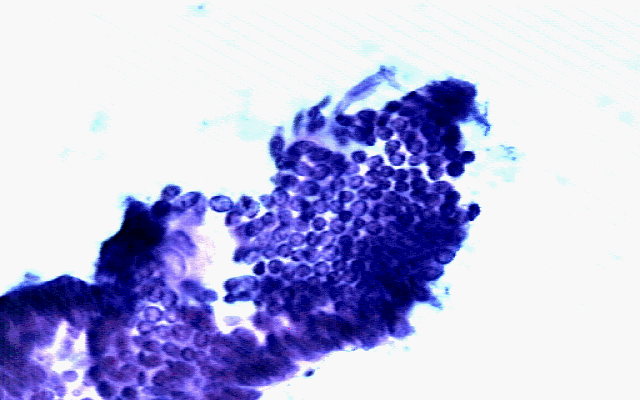

In [3]:
images[92751]

#### Import Data

In [4]:
data = sklearn.datasets.load_breast_cancer()
X = data['data']
Y = data['target']
X_names = data['feature_names']
Y_names = data['target_names']

#### The individual features:

In [5]:
X_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### Create attributes by grouping alike features

In [6]:
attribute_names = ['radius', 'texture', 'perimeter', 'area','smoothness',
                'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
attribute_order = [j for sublist in [[i, i+10, i+20] for i in range(10)] for j in sublist]

# reorder features by attribute
X = X[:,attribute_order]
X_names = X_names[attribute_order]
attributes = np.split(np.arange(30), 10)

for i,attr in enumerate(attributes):
    print('Attrib {}:\t{}'.format(i, '\t'.join(X_names[attr])))    


Attrib 0:	mean radius	radius error	worst radius
Attrib 1:	mean texture	texture error	worst texture
Attrib 2:	mean perimeter	perimeter error	worst perimeter
Attrib 3:	mean area	area error	worst area
Attrib 4:	mean smoothness	smoothness error	worst smoothness
Attrib 5:	mean compactness	compactness error	worst compactness
Attrib 6:	mean concavity	concavity error	worst concavity
Attrib 7:	mean concave points	concave points error	worst concave points
Attrib 8:	mean symmetry	symmetry error	worst symmetry
Attrib 9:	mean fractal dimension	fractal dimension error	worst fractal dimension


##### Prepare Data

In [7]:
# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, ids_train, ids_test = train_test_split(X, Y, ids, test_size = 0.25, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###### Train Classifier
We use scikit-learn's Gaussian Naive Bayes, which by construction does density estimation

In [8]:
import sklearn.naive_bayes

classifier = sklearn.naive_bayes.GaussianNB()
classifier.fit(X_train, Y_train)
print('Accuracy on test: {:4.2f}'.format(100*classifier.score(X_test, Y_test)))


Accuracy on test: 91.61


##### Create a Weight-of-Evidence wrapper around the classifier

In [9]:
class woe_scikit_gnb():
    """
        WOE Wrapper around scikit GNB classifier
    """
    def __init__(self, clf, task=None, classes=None, input_size=None):
        #super().__init__(clf, task, classes, input_size)
        self.cond_type = 'nb'
        self.model = clf
    
    def log_prob(self, x, y):
        """ 
        """
        n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.model.sigma_[y, :]))
        n_ij -= 0.5 * np.sum(((x - self.model.theta_[y, :]) ** 2) /
                         (self.model.sigma_[y,:]), 1)          
        return n_ij     


    def log_prob_partial(self, subset, x, y):
        # Using naive Bayes, we do P(X_s | X_s1,...X_s, Y) = P (X_s, Y)
        # for GNB, this is easy: just drop non-included vars
        # en.wikipedia.org/wiki/Multivariate_normal_distribution#Marginal_distributions        
        n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.model.sigma_[y, subset]))
        n_ij -= 0.5 * np.sum(((x[:,subset] - self.model.theta_[y, subset]) ** 2) /
                         (self.model.sigma_[y, subset]), 1)          
        return n_ij
    
    def generalized_conditional_ll(self, x, y, subset=None, verbose = False, **kwargs):
        ## TODO: either make a non-torch version of the equivalent method in wrapper, or transsfortm to torch and use that one
        if subset is None:
            return self.log_prob(x, y)
        else:
            return self.log_prob_partial(subset, x, y)
        
    def woe(self, x, y1, y2, **kwargs):
        ll_num   = self.generalized_conditional_ll(x, y1, **kwargs)
        ll_denom = self.generalized_conditional_ll(x, y2, **kwargs)
        woe = ll_num - ll_denom
        return woe
    
woe_model = woe_scikit_gnb(classifier, classes = [0,1])    

We can now query model for WoE of entire inputs:

In [10]:
woe_model.woe(X_test[:3,:], 1, 0)

array([-23.88068615,  31.21006105,  33.59700322])

or subsets of the input:

In [11]:
woe_model.woe(X_test[:3,:], 1, 0, subset = attributes[2])

array([0.48402012, 5.14010584, 4.18367075])

Note that the dataset is imbalanced: prior log-odds are slightly in favor of benign.

In [12]:
print('Priors:', dict(zip(Y_names, classifier.class_prior_)))
prior_odds = np.log(classifier.class_prior_[0]/classifier.class_prior_[1])
print('Prior log odds: {:8.2f}'.format(prior_odds))

Priors: {'malignant': 0.3732394366197183, 'benign': 0.6267605633802817}
Prior log odds:    -0.52


##### Explain a prediction!


In [22]:
def annotate_group(name, xspan, ax=None):
    """Annotates a span of the x-axis"""
    def annotate(ax, name, left, right, y, pad):
        arrow = ax.annotate(name,
                xy=(left, y), xycoords='data',
                xytext=(right, y-pad), textcoords='data',
                annotation_clip=False, verticalalignment='top',
                horizontalalignment='center', linespacing=2.0,
                arrowprops=dict(arrowstyle='-', shrinkA=0, shrinkB=0,
                        connectionstyle='angle,angleB=90,angleA=0,rad=5'),
                fontsize=8
                )
        return arrow
    if ax is None:
        ax = plt.gca()
    ymin = ax.get_ylim()[0] + 1.5
    ypad = 0.01 * np.ptp(ax.get_ylim())
    xcenter = np.mean(xspan)
    left_arrow = annotate(ax, name, xspan[0], xcenter, ymin, ypad)
    right_arrow = annotate(ax, name, xspan[1], xcenter, ymin, ypad)
    return left_arrow, right_arrow

def explain(x, y = None, attribute_names = None, class_names = None, base_logodds = None,
            threshold = 2, plot=True, figsize = (4,3), save_path=None):
    y_num, y_den = 0, 1
    pred_class = classifier.predict(x)[0]
    pred_prob  = classifier.predict_proba(x)[0][pred_class]
    partial_woes = []
    color_pos, color_neu, color_neg = 'green', 'grey_50','red'
    for attribute in attributes:
        partial_woes.append(woe_model.woe(x, y_num, y_den, subset=attribute))
    partial_woes = np.array(partial_woes)
    total_woe = woe_model.woe(x, y_num, y_den)[0]
    prior_odds = np.log(classifier.class_prior_[y_num]/classifier.class_prior_[y_den])
    
    sorted_partial_woes= [(i,x[0]) for x,i in sorted(zip(partial_woes,range(len(attributes))), reverse=True)]
    print('Example index: {}'.format(idx))
    print('Prediction: {} (p={:2.2f})'.format(class_names[pred_class], pred_prob))
    print('True class: {}'.format(class_names[y[0]]))
    print('Bayes odds explanation:\n')
    print('   {:8.2f}     =        {:8.2f}  +  {:<8.2f}'.format(prior_odds + total_woe, prior_odds, total_woe))
    print('post. log-odds  =  prior log-odds  +  total_woe')
    print('\nTotal WoE in favor of "{}": {:8.2f}'.format(class_names[y_num], total_woe))
    colors = [color_pos,color_neu,color_neg]
    ci = 0
    for i,woe in sorted_partial_woes:
        #if np.abs(woe) < threshold: continue
        if ci == 0 and woe < threshold: ci +=1
        if ci == 1 and woe < -threshold: ci +=1
        print(colored.fg(colors[ci]) + 'woe({:>20}) = {:8.2f}'.format(attribute_names[i], woe))
    print(colored.attr('reset') + '     {:>20} = {:8.2f}'.format('sum', partial_woes.sum()))

    # Compare value of most informative attrib to mean values per class
    top_attrib      = np.argmax(np.abs(partial_woes))
    top_attrib_idxs = attributes[top_attrib]
    vals_top_attrib = x[0,top_attrib_idxs]
    print('\nAverage "{}" value for {} examples =\n\t{}'.format(attribute_names[top_attrib], class_names[y_num],classifier.theta_[y_num, top_attrib_idxs]))
    print('Average "{}" value for {} examples =\n\t{}'.format(attribute_names[top_attrib], class_names[y_den],classifier.theta_[y_den, top_attrib_idxs]))
    print('Value of "{}" in this example =\n\t{}'.format(attribute_names[top_attrib], vals_top_attrib))
    
    if plot:
        fig, ax = plt.subplots(figsize=figsize)
        color_pos, color_neu, color_neg = '#3C8ABE', '#808080','#CF5246'
        attrib_ord, woe = list(zip(*sorted_partial_woes))
        woe = np.array([base_logodds] + list(woe))
        categories = ['PRIOR LOG-ODDS'] + [attribute_names[i] for i in attrib_ord]
        y_pos = np.arange(len(attribute_names)+1)
        
        positive = woe >= threshold
        negative = woe <= -threshold
        neutral  = (woe > -threshold) & (woe < threshold)
        if np.any(positive): ax.barh(y_pos[positive], woe[positive], align='center', color = color_pos)
        if np.any(neutral): ax.barh(y_pos[neutral], woe[neutral], align='center', color = color_neu)
        if np.any(negative): ax.barh(y_pos[negative], woe[negative], align='center', color = color_neg)
        
        ax.set_yticks(y_pos)
        ax.set_yticklabels(categories)
        ax.invert_yaxis()  # labels read top-to-bottom
        #ax.set_xlabel('Weight-of-Evidence')
        ax.set_title('Per-Attribute Weight of Evidence')
        ax.set_xlim(-1+min(np.min(partial_woes),-6), max(6,np.max(partial_woes))+1)
        ax.axvline(2, alpha = 0.5, color = 'k', linestyle = '--')
        ax.axvline(0, alpha = 1, color = 'k', linestyle = '-')
        ax.axvline(-2, alpha = 0.5, color = 'k', linestyle = '--')
        ax.axhline(0.5, alpha=0.5, color='red', linestyle = ':')
        #ax.text(-2.5,0,'significative against',horizontalalignment='right')
        
        print()
    
        annotate_group('Significant\nAgainst', (ax.get_xlim()[0],-threshold), ax)
        annotate_group('Neutral\nLow Sign.', (-threshold, threshold), ax)        
        annotate_group('Significant\nIn Favor', (threshold,ax.get_xlim()[1]), ax)
        if save_path:
            plt.savefig(save_path + '_expl.pdf', bbox_inches = 'tight', format='pdf', dpi=300)
        plt.show()
    

Choose an test example to explain

In [23]:
idx = 51

Explain!

Example index: 51
Prediction: malignant (p=1.00)
True class: malignant
Bayes odds explanation:

      27.81     =           -0.52  +  28.33   
post. log-odds  =  prior log-odds  +  total_woe

Total WoE in favor of "malignant":    28.33
woe(      concave points) =    11.83
woe(         compactness) =    11.24
woe(           concavity) =     5.78
woe(           perimeter) =     3.80
woe(             texture) =     1.37
woe(          smoothness) =     0.33
woe(   fractal dimension) =     0.09
woe(            symmetry) =    -0.88
woe(              radius) =    -1.93
woe(                area) =    -3.30
                      sum =    28.33

Average "concave points" value for malignant examples =
	[1.00514628 0.48501235 1.03078379]
Average "concave points" value for benign examples =
	[-0.59857026 -0.28882758 -0.61383754]
Value of "concave points" in this example =
	[1.02225767 1.20702903 0.87609494]



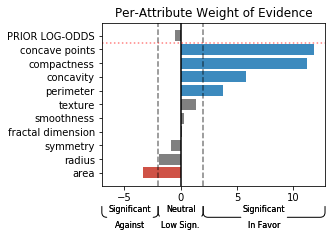

In [24]:
explain(X_test[idx:idx+1], Y_test[idx:idx+1], attribute_names, Y_names, base_logodds=prior_odds, threshold = 2)

Explain now an example for which we have an image

915691
Example index: 0
Prediction: malignant (p=1.00)
True class: malignant
Bayes odds explanation:

      23.36     =           -0.52  +  23.88   
post. log-odds  =  prior log-odds  +  total_woe

Total WoE in favor of "malignant":    23.88
woe(      concave points) =    12.41
woe(           concavity) =     5.23
woe(         compactness) =     3.76
woe(   fractal dimension) =     2.53
woe(          smoothness) =     2.19
woe(            symmetry) =     2.18
woe(             texture) =     1.14
woe(           perimeter) =    -0.48
woe(              radius) =    -2.25
woe(                area) =    -2.84
                      sum =    23.88

Average "concave points" value for malignant examples =
	[1.00514628 0.48501235 1.03078379]
Average "concave points" value for benign examples =
	[-0.59857026 -0.28882758 -0.61383754]
Value of "concave points" in this example =
	[0.84017194 0.27743345 1.37043754]



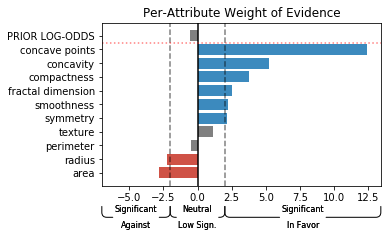

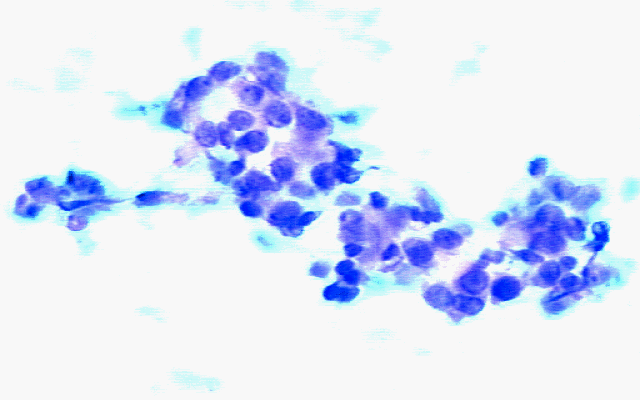

In [25]:
# Compute intersection of examples with image and examples in test

candidates = [i for i in ids_test if i in images.keys()]

fid = candidates[0]
print(fid)

idx = ids_test.index(fid)
explain(X_test[idx:idx+1], Y_test[idx:idx+1], attribute_names, Y_names,
        base_logodds=prior_odds, threshold = 2, figsize=(5,3), save_path = 'cancer_example_{}'.format(fid))
images[fid]